<p>
Homework: https://work.caltech.edu/homework/final.pdf
<p>

&#x2714; and &#x2718; Answers:

1. e (65) &#x2714;
2. d (average of logistic regressions is not necessarily a logistic regression) &#x2714;
3. d &#x2714;
4. d &#x2714;
5. a &#x2714;
6. b &#x2714;

7. d &#x2714;
8. b &#x2714;
9. e &#x2714;
10. a &#x2714;

11. c (x = 0.5 separates maximally) &#x2714;
12. c &#x2714;

13. a &#x2714;
14. e &#x2714;
15. d &#x2714;
16. d &#x2714;
17. c &#x2714;
18. a &#x2714;

19. b (linearly increases) &#x2714;
20. d --> c (is average, no better no worse) &#x2718;

19/20 = 95% correct

<p>
Answer key: https://work.caltech.edu/homework/final_sol.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
# Questions 7 through 10
train = pd.read_fwf('http://www.amlbook.com/data/zip/features.train', header=None, 
                    names=['digit', 'intensity', 'symmetry'])
test = pd.read_fwf('http://www.amlbook.com/data/zip/features.test', header=None, 
                   names=['digit', 'intensity', 'symmetry'])

In [3]:
def add_bias(x):
    '''Return (1, x1, x2)'''
    x1 = x.iloc[:, 0]
    x2 = x.iloc[:, 1]
    
    z = x.copy()
    z.insert(0, 'bias', np.ones(len(x)))
    return z

def non_linear_transform(x):
    '''Return (1, x1, x2, x1x2, x1^2, x2^2)'''
    x1 = x.iloc[:, 0]
    x2 = x.iloc[:, 1]
    
    z = x.copy()
    z.insert(0, 'bias', np.ones(len(x)))
    z.loc[:, 3] = x1 * x2
    z.loc[:, 4] = x1 ** 2
    z.loc[:, 5] = x2 ** 2
    return z

from numpy.linalg import inv
def linear_regression_with_regularization(Z, y, lambda_reg):
    Z_T_Z = np.dot(Z.T, Z)
    Z_T_Z_reg = Z_T_Z + (lambda_reg * np.identity(np.size(Z_T_Z, 0)))
    Z_T_Z_reg_inverse = inv(Z_T_Z_reg)
    Z_dagger = np.dot(Z_T_Z_reg_inverse, Z.T)
    weights = np.dot(Z_dagger, y)    
    return weights

from functools import partial
def ova_transform(df, num):
    df_copy = df.copy()
    df_copy.digit = df_copy.digit.map(lambda x: 1 if x == num else -1)
    return df_copy

def ovo_transform(df, num, num2):
    df_copy = df.loc[df.digit.isin([num, num2])].copy()
    df_copy.digit = df_copy.digit.map(lambda x: 1 if x == num else -1)
    return df_copy

def error(W, X, y):
    misclassified = np.sign(np.dot(X, W)) != y
    return 1.0 * misclassified.sum()/len(misclassified)

def process(train, test, ovo_or_ova_transform, predict_digit, transform, lambda_reg):
    train = ovo_or_ova_transform(train, predict_digit)
    test = ovo_or_ova_transform(test, predict_digit)

    train_x = train.iloc[:, 1:]
    train_y = train.iloc[:, 0]
    train_z = transform(train_x)
    
    test_x = test.iloc[:, 1:]
    test_y = test.iloc[:, 0]
    test_z = transform(test_x)
    
    weights = linear_regression_with_regularization(train_z, train_y, lambda_reg)
    E_in = error(weights, train_z, train_y)
    E_out = error(weights, test_z, test_y)
    print "Digit: {}, Lambda: {}, Transform: {}, E_in: {}, E_out: {}".format(
        predict_digit, lambda_reg, transform.__name__, E_in, E_out)

In [4]:
for num in [5, 6, 7, 8, 9]:
    process(train, test, ovo_or_ova_transform=ova_transform, predict_digit=num, transform=add_bias, lambda_reg=1)

Digit: 5, Lambda: 1, Transform: add_bias, E_in: 0.0762584007681, E_out: 0.079720976582
Digit: 6, Lambda: 1, Transform: add_bias, E_in: 0.0910711836511, E_out: 0.0847035376183
Digit: 7, Lambda: 1, Transform: add_bias, E_in: 0.0884652311068, E_out: 0.0732436472347
Digit: 8, Lambda: 1, Transform: add_bias, E_in: 0.0743382252092, E_out: 0.0827105132038
Digit: 9, Lambda: 1, Transform: add_bias, E_in: 0.0883280757098, E_out: 0.0881913303438


In [5]:
for num in [0, 1, 2, 3, 4]:
    process(train, test, ovo_or_ova_transform=ova_transform, predict_digit=num, transform=non_linear_transform, lambda_reg=1)

Digit: 0, Lambda: 1, Transform: non_linear_transform, E_in: 0.10231792621, E_out: 0.106626806178
Digit: 1, Lambda: 1, Transform: non_linear_transform, E_in: 0.0123439857358, E_out: 0.02192326856
Digit: 2, Lambda: 1, Transform: non_linear_transform, E_in: 0.100260595254, E_out: 0.0986547085202
Digit: 3, Lambda: 1, Transform: non_linear_transform, E_in: 0.0902482512687, E_out: 0.0827105132038
Digit: 4, Lambda: 1, Transform: non_linear_transform, E_in: 0.0894253188863, E_out: 0.0996512207275


In [6]:
for num in range(10):
    for transform in [add_bias, non_linear_transform]:
        process(train, test, ovo_or_ova_transform=ova_transform, predict_digit=num, transform=transform, lambda_reg=1)

Digit: 0, Lambda: 1, Transform: add_bias, E_in: 0.109312851461, E_out: 0.11509715994
Digit: 0, Lambda: 1, Transform: non_linear_transform, E_in: 0.10231792621, E_out: 0.106626806178
Digit: 1, Lambda: 1, Transform: add_bias, E_in: 0.0152242490742, E_out: 0.0224215246637
Digit: 1, Lambda: 1, Transform: non_linear_transform, E_in: 0.0123439857358, E_out: 0.02192326856
Digit: 2, Lambda: 1, Transform: add_bias, E_in: 0.100260595254, E_out: 0.0986547085202
Digit: 2, Lambda: 1, Transform: non_linear_transform, E_in: 0.100260595254, E_out: 0.0986547085202
Digit: 3, Lambda: 1, Transform: add_bias, E_in: 0.0902482512687, E_out: 0.0827105132038
Digit: 3, Lambda: 1, Transform: non_linear_transform, E_in: 0.0902482512687, E_out: 0.0827105132038
Digit: 4, Lambda: 1, Transform: add_bias, E_in: 0.0894253188863, E_out: 0.0996512207275
Digit: 4, Lambda: 1, Transform: non_linear_transform, E_in: 0.0894253188863, E_out: 0.0996512207275
Digit: 5, Lambda: 1, Transform: add_bias, E_in: 0.0762584007681, E_out

In [7]:
for lambda_reg in [1, 0.01]:
    process(train, test, 
            ovo_or_ova_transform=partial(ovo_transform, num2=5), 
            predict_digit=1, 
            transform=non_linear_transform, 
            lambda_reg=lambda_reg)

Digit: 1, Lambda: 1, Transform: non_linear_transform, E_in: 0.00512491992313, E_out: 0.0259433962264
Digit: 1, Lambda: 0.01, Transform: non_linear_transform, E_in: 0.00448430493274, E_out: 0.0283018867925


In [8]:
# Questions 11 - 12
import cvxopt

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def hard_margin_SVM(X, y, kernel=linear_kernel):
    '''
    The SVM algorithm here is taken for academic use from publicly available code by Mathieu Blondel on GitHub.
    https://gist.github.com/mblondel/586753/7b4f65314bb9a8b6ca82794b8b613b6edcd40d46
    '''
    n_samples, n_features = X.shape
    
    # Gram matrix
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = kernel(X[i], X[j])
    
    P = cvxopt.matrix(np.outer(y,y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1,n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
    h = cvxopt.matrix(np.zeros(n_samples))
    
    # Solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a_all = np.ravel(solution['x'])

    sv_index = a_all > 1e-5
    ind = np.arange(len(a_all))[sv_index]

    a = a_all[sv_index]
    sv = X[sv_index]
    sv_y = y[sv_index]
    
    # Intercept
    b = 0
    for n in range(len(a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n], sv_index])
    b /= len(a)
    
    # Weight vector
    if kernel == linear_kernel:
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv[n]
    else:
        w = None
    
    return a, sv, sv_y, b, w

Support vectors: 5


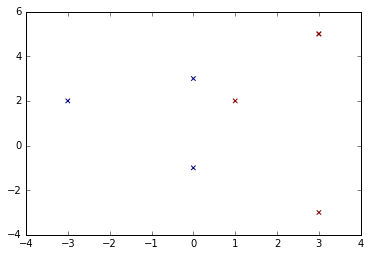

In [9]:
x1 = np.array([[1., 0., 0., -1., 0., 0., -2.]])
x2 = np.array([[0., 1., -1., 0., 2., -2., 0.]])
y = np.array([[-1., -1., -1., 1., 1., 1., 1.]])
z1 = x2*x2 - 2*x1 - 1
z2 = x1*x1 - 2*x2 + 1
plt.scatter(z1, z2, c=y, marker='x')

X = np.concatenate((x1.T, x2.T), axis=1)
Y = y.T

def custom_kernel(x1, x2):
    return (1 + np.dot(x1, x2)) ** 2

_, sv, _, _, _ = hard_margin_SVM(X, Y, kernel=custom_kernel)

print "Support vectors: {}".format(len(sv))

In [10]:
# Questions 13 - 18
import numpy.linalg

def custom_target_function(x1, x2):
    return np.sign(x2 - x1 + 0.25 * np.sin(np.pi * x1))
    
def generate_samples(N=100, target_function=custom_target_function, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    x1_s = list(np.random.uniform(x_min, x_max, size=N))
    x2_s = list(np.random.uniform(y_min, y_max, size=N))
    y_s = [target_function(x1, x2) for x1, x2 in zip(x1_s, x2_s)]
    if plot:
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(x1_s, x2_s, c=y_s, marker='x')
    X = np.array([x1_s, x2_s]).transpose()
    X_with_bias = np.array([np.ones(N), x1_s, x2_s]).transpose()
    y = np.array(y_s)
    return X, X_with_bias, y

def rbf(x1, x2, gamma):
    return np.exp( - gamma * numpy.linalg.norm(x1-x2) ** 2)

def lloyd_s_algorithm(X, K):
    @np.vectorize
    def find_closest_center(x1, x2):
        distances = [numpy.linalg.norm((x1, x2) - center) for center in centers]
        return distances.index(min(distances))
    
    X_df = pd.DataFrame(X, columns=['x1', 'x2'])
    X_df['center'] = -1
    centers = X[np.random.choice(X.shape[0], K)]
    X_df['new_center'] = find_closest_center(X_df['x1'], X_df['x2'])
    while sum(X_df.center != X_df.new_center):
        X_df.center = X_df.new_center
        for c in range(K):
            subset = X_df[X_df.center == c]
            if len(subset) == 0:
                return None
            centers[c] = np.array(np.mean(subset[['x1', 'x2']]))
        X_df['new_center'] = find_closest_center(X_df['x1'], X_df['x2'])
    return centers

def make_phi(X, centers, gamma):
    N = np.size(X, 0)
    K = np.size(centers, 0)
    phi = numpy.ones((N, K+1))
    for n in range(N):
        for k in range(K):
            phi[n, k+1] = rbf(X[n, :], centers[k], gamma)
    return phi

def psuedo_inverse(Z, y):
    Z_T_Z = np.dot(Z.T, Z)
    Z_T_Z_inverse = inv(Z_T_Z)
    Z_dagger = np.dot(Z_T_Z_inverse, Z.T)
    weights = np.dot(Z_dagger, y)
    return weights

def get_predictions(weights, centers, gamma, X):
    @np.vectorize
    def point_prediction(x1, x2):
        distances = [rbf((x1, x2), center, gamma) for center in centers]
        distances.insert(0, 1)
        return np.sign(np.dot(weights, distances))
    
    X_df = pd.DataFrame(X, columns=['x1', 'x2'])
    return point_prediction(X_df['x1'], X_df['x2'])

def error(predictions, y):
    misclassified = predictions != y
    return 1.0 * misclassified.sum()/len(misclassified)

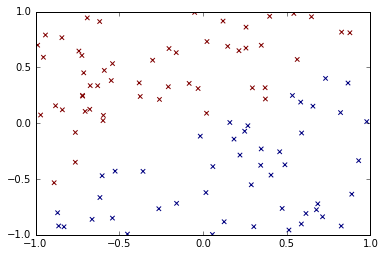

In [11]:
num_samples = 100
X, _, y = generate_samples(N=num_samples, plot=True)

In [12]:
num_centers = 12
gamma = 1.5

In [13]:
centers = lloyd_s_algorithm(X, K=num_centers)
if centers is not None:
    phi = make_phi(X, centers, gamma)
    rbf_weights = psuedo_inverse(phi, y)
    rbf_predictions = get_predictions(rbf_weights, centers, gamma, X)
    E_in_rbf = error(rbf_predictions, y)
    print 'E_in_rbf', E_in_rbf
else:
    print "Empty cluster"

Empty cluster


In [14]:
a, sv, sv_y, b, _ = hard_margin_SVM(X, y, kernel=partial(rbf, gamma=gamma))
svm_weights = a * sv_y
svm_weights = np.insert(svm_weights, 0, b)
svm_predictions = get_predictions(svm_weights, sv, gamma, X)
E_in_svm = error(svm_predictions, y)
print 'E_in_svm', E_in_svm
print "Support vectors: {}".format(len(sv))

E_in_svm 0.0
Support vectors: 8


In [15]:
def experiment(runs=100, num_samples = 100, num_centers=9, gamma=1.5):
    successful_runs = 0
    run_with_empty = 0.0
    total_empty_clusters = 0.0
    non_separable_svms = 0.0
    perfect_rbfs = 0.0
    sum_E_in_rbf = 0.0
    sum_E_out_rbf = 0.0
    sum_E_out_svm = 0.0
    kernel_wins = 0.0

    def print_stats(total):
        print '{:03d}: fail {:.2f}% empty {:.2f}, empty% {:.2f}%, perfect_rbf: {:.2f}%, E_in_rbf: {:.2f}, E_out_rbf {:.2f}%, E_out_svm {:.2f}%, kernel_wins {:.2f}%'.format(
            total+1,
            non_separable_svms*100.0/(total+1),
            total_empty_clusters*1./successful_runs,
            run_with_empty*100./successful_runs,
            perfect_rbfs*100.0/successful_runs,
            sum_E_in_rbf*100.0/successful_runs,
            sum_E_out_rbf*100.0/successful_runs,
            sum_E_out_svm*100.0/successful_runs,
            kernel_wins*100.0/successful_runs
        )

    for total in range(runs):
        empty_clusters = 0
        non_separable_svms = 0
        X, _, y = generate_samples(N=num_samples, plot=False)
        X_out, _, y_out = generate_samples(N=10*num_samples, plot=False)
        centers = lloyd_s_algorithm(X, K=num_centers)
        while centers is None:
            empty_clusters += 1
            centers = lloyd_s_algorithm(X, K=num_centers)
        phi = make_phi(X, centers, gamma)
        rbf_weights = psuedo_inverse(phi, y)
        E_in_rbf = error(get_predictions(rbf_weights, centers, gamma, X), y)
        E_out_rbf = error(get_predictions(rbf_weights, centers, gamma, X_out), y_out)
        a, sv, sv_y, b, _ = hard_margin_SVM(X, y, kernel=partial(rbf, gamma=gamma))
        svm_weights = a * sv_y
        svm_weights = np.insert(svm_weights, 0, b)
        E_in_svm = error(get_predictions(svm_weights, sv, gamma, X), y)
        E_out_svm = error(get_predictions(svm_weights, sv, gamma, X_out), y_out)
        if E_in_rbf == 0:
            perfect_rbfs += 1
        if E_in_svm != 0:
            non_separable_svms += 1
        else:
            successful_runs += 1
            total_empty_clusters += empty_clusters
            if empty_clusters:
                run_with_empty += 1
            sum_E_in_rbf += E_in_rbf
            sum_E_out_rbf += E_out_rbf
            sum_E_out_svm += E_out_svm
            if E_out_svm < E_out_rbf:
                kernel_wins += 1
    print_stats(total)

In [16]:
experiment(runs=200, num_samples = 100, num_centers=9, gamma=1.5)

200: fail 0.00% empty 0.44, empty% 31.50%, perfect_rbf: 2.50%, E_in_rbf: 3.14, E_out_rbf 5.85%, E_out_svm 3.18%, kernel_wins 91.00%


In [17]:
experiment(runs=200, num_samples = 100, num_centers=12, gamma=1.5)

200: fail 0.00% empty 1.04, empty% 51.50%, perfect_rbf: 9.50%, E_in_rbf: 2.13, E_out_rbf 4.65%, E_out_svm 3.00%, kernel_wins 81.00%


In [18]:
experiment(runs=200, num_samples = 100, num_centers=9, gamma=2)

200: fail 0.00% empty 0.43, empty% 29.00%, perfect_rbf: 1.00%, E_in_rbf: 3.69, E_out_rbf 6.09%, E_out_svm 3.30%, kernel_wins 91.50%


In [19]:
def rbf_only_experiment(runs=100, num_samples = 100, centers=None, gammas=None, num_centers=9, gamma=1.5):
    down_down = 0.0
    down_up = 0.0
    up_down = 0.0
    up_up = 0.0
    same = 0.0
    
    def print_stats(total):
        print '{:03d}: down_down: {:.2f}%, down_up: {:.2f}%, up_down: {:.2f}%, up_up: {:.2f}%, same: {:.2f}%'.format(
            total+1,
            down_down*100.0/(total+1),
            down_up*100.0/(total+1),
            up_down*100.0/(total+1),
            up_up*100.0/(total+1),
            same*100.0/(total+1),
        )

    for total in range(runs):
        empty_clusters = 0
        non_separable_svms = 0
        X, _, y = generate_samples(N=num_samples, plot=False)
        X_out, _, y_out = generate_samples(N=10*num_samples, plot=False)

        E_in = []
        E_out = []
        if centers:
            for num_centers in centers:
                clusters = lloyd_s_algorithm(X, K=num_centers)
                while clusters is None:
                    empty_clusters += 1
                    clusters = lloyd_s_algorithm(X, K=num_centers)
                phi = make_phi(X, clusters, gamma)
                rbf_weights = psuedo_inverse(phi, y)
                E_in.append(error(get_predictions(rbf_weights, clusters, gamma, X), y))
                E_out.append(error(get_predictions(rbf_weights, clusters, gamma, X_out), y_out))
        elif gammas:
            for gamma in gammas:
                clusters = lloyd_s_algorithm(X, K=num_centers)
                while clusters is None:
                    empty_clusters += 1
                    clusters = lloyd_s_algorithm(X, K=num_centers)
                phi = make_phi(X, clusters, gamma)
                rbf_weights = psuedo_inverse(phi, y)
                E_in.append(error(get_predictions(rbf_weights, clusters, gamma, X), y))
                E_out.append(error(get_predictions(rbf_weights, clusters, gamma, X_out), y_out))
        else:
            raise Exception("Both centers and gammas can't be None")
        if E_in[1] < E_in[0]:
            if E_out[1] < E_out[0]:
                down_down += 1
            elif E_out[1] > E_out[0]:
                down_up += 1
        elif E_in[1] > E_in[0]:
            if E_out[1] < E_out[0]:
                up_down += 1
            elif E_out[1] > E_out[0]:
                up_up += 1
        elif E_out[1] == E_out[0]:
            same += 1
    print_stats(total)

In [21]:
rbf_only_experiment(runs=200, num_samples = 100, centers=[9, 12], gammas=None, num_centers=9, gamma=1.5)

200: down_down: 54.00%, down_up: 8.50%, up_down: 5.50%, up_up: 7.00%, same: 2.00%


In [22]:
rbf_only_experiment(runs=200, num_samples = 100, centers=None, gammas=[1.5, 2], num_centers=9, gamma=1.5)

200: down_down: 25.00%, down_up: 10.00%, up_down: 8.50%, up_up: 36.00%, same: 2.00%
